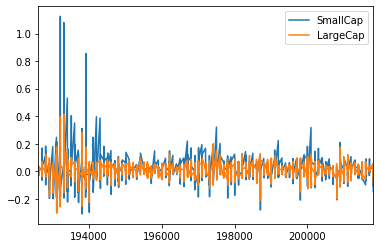

In [73]:
import pandas as pd

me_m = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0, index_col = 0, parse_dates = True,na_values = -99.99
                     )

rets = me_m [['Lo 20', 'Hi 20']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [74]:
rets.index = pd.to_datetime(rets.index, format = "%Y%m")
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [75]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [76]:
rets["1999":"2015"]

,SmallCap,LargeCap
1999-01,0.1114,0.0153
1999-02,-0.0399,-0.0172
1999-03,-0.0308,0.0368
1999-04,0.0824,0.0679
1999-05,0.0435,-0.0048
...,...,...
2015-08,-0.0347,-0.0559
2015-09,-0.0610,-0.0333
2015-10,0.0385,0.0710
2015-11,0.0165,0.0015


In [83]:
n_months=rets.shape[0]

returns_per_month = (rets+1).prod()**(1/n_months) - 1

annualized_return = (returns_per_month + 1)**12 - 1

annualized_return

SmallCap    0.151977
LargeCap    0.098490
dtype: float64

In [ ]:
# Compute Drawdowns

1. Compute a wealth index
2. Compute a previous peaks
3. Compute drawdown

In [77]:

# 1. Compute a wealth index

wealth_index = 1000 * (1+rets["LargeCap"]).cumprod()

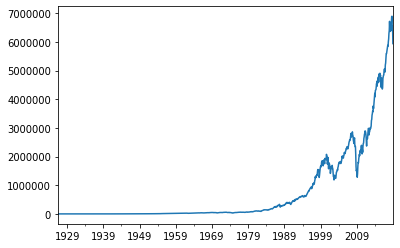

In [78]:
wealth_index.plot.line()

In [26]:

# 2. Compute a previous peaks

previous_peaks = wealth_index.cummax()

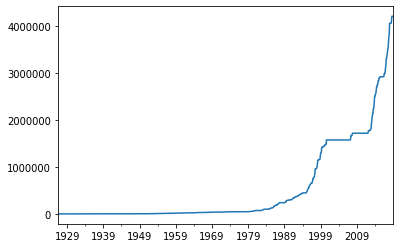

In [27]:
previous_peaks.plot()

In [29]:

# 3. Compute drawdown

drawdown = (wealth_index - previous_peaks) / previous_peaks

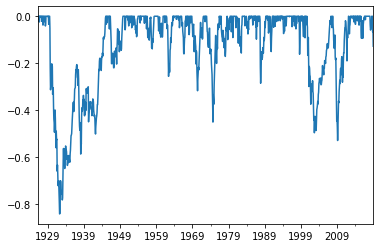

In [30]:
drawdown.plot()

In [32]:
drawdown.min()

-0.8400375277943123

In [40]:
drawdown["1975":].min()

-0.5280945042309304

In [39]:
drawdown["1975":].idxmin()

Period('2009-02', 'M')

In [38]:
drawdown.min()

-0.8400375277943123

In [37]:
drawdown.idxmin()

Period('1932-05', 'M')

In [47]:
# Crear funcion

def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Compute and retuns a DataFrame that contains:
    -Wealth index
    -Previous peaks
    -Percent drawdowns
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
        
    })
    

In [48]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [50]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


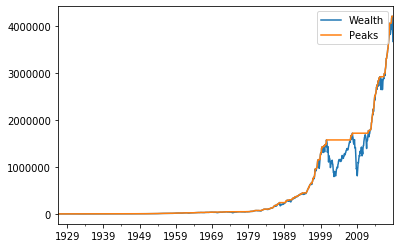

In [51]:
drawdown(rets["LargeCap"])[["Wealth", "Peaks"]].plot()

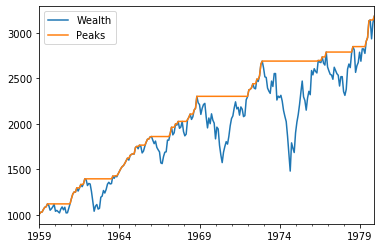

In [61]:
drawdown(rets["1959":"1979"]["LargeCap"])[["Wealth", "Peaks"]].plot()